**OpenAI 모듈 설치, 불러오기 및 API key 설정하기**



In [ ]:
!pip install openai

In [ ]:
import openai
from openai import OpenAI

client = openai.Client(api_key='your API key')

#**1. 대화 하기**

**모델 종류 (맞게 써야됨)** \
- gpt-3.5-turbo \
- gpt-4 \
- gpt-4-turbo \
...

**대표적인 Parameter** \
- **system_content:** system에게 할당 되는 prompt ("너는 helpful assistant AI야")
- **user_content:** 사람이 입력하는 prompt ("오늘 점심 메뉴 추천 해줘")
- **temperature:** 0-2까지의 값으로, 높을수록 답변의 다양성이 올라감
- **max_tokens:** 전체 token 수 제한
- **n:** 같은 질문을 n번 반복

\
Reference: https://platform.openai.com/docs/api-reference/chat/create

In [ ]:
# 대화 함수 정의
def gpt_chat(client, system_content, user_content, temperature=1.5, max_tokens=50, n=3):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        n=n
    )
    return [choice.message.content for choice in response.choices] #API key 응답구조에서 대답 부분만 빼오는 코드

# Prompt 정의
system_content = "Your are a kind friend"
user_content = "Choose your favorite Burger franchise"

In [ ]:
# 결과 출력
responses = gpt_chat(client, system_content, user_content)
for i, response in enumerate(responses):
    print(f"Response {i+1}: {response}")

Response 1: I'm sorry, I am an AI and I do not have the ability to have personal preferences or favorites. However, some popular burger franchises that many people enjoy include McDonald's, Burger King, and In-N-Out Burger.
Response 2: My personal favorite burger franchise would be Five Guys.
Response 3: My favorite burger franchise would have to be In-N-Out Burger. Their burgers are always tasty, made with fresh high-quality ingredients, and their secret sauce adds the perfect touch of flavor. Plus, their menu is simple and uncomplicated, focusing on delicious


#**2. 이미지 생성**

**모델 종류 (맞게 써야됨)** \
- dall-e-2 \
- dall-e-3 \
...

**대표적인 Parameter** \
- **prompt:** prompt ("피라미드 그려줘") \
- **n:** 같은 질문을 n번 반복 \
- **size:** : 모델마다 가능한 사이즈 확인!


\
Reference: https://platform.openai.com/docs/api-reference/images

In [ ]:
def gpt_generate_image(client, prompt, n=2, size="1024x1024"):
    response = client.images.generate(
        model="dall-e-2",  #모델이 제공하는 사이즈에 맞게 설정 안하면 오류남. Document 참고!
        prompt=prompt,
        n=n, #dall-e-2만 10개까지 생성가능
        size=size
    )
    return response.data

prompt = "newly married couple"

In [ ]:
#API key 응답구조에서 사진부분만 여는 코드

from IPython.display import Image, display

image_results = gpt_generate_image(client, prompt)

for image_obj in image_results:
    display(Image(url=image_obj.url))

In [ ]:
prompt = "Ancient architecture in Egypt"

from IPython.display import Image, display

image_results = gpt_generate_image(client, prompt)

for image_obj in image_results:
    display(Image(url=image_obj.url))

# **3. 여러 질문 하나에 처리하기**



In [ ]:
# 함수 정의 (위와 같음)
def gpt_chat(client, system_content, user_content, temperature=1.5, max_tokens=40, n=1):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        n=n
    )
    return [choice.message.content for choice in response.choices]

In [ ]:
import numpy as np

system_content = "Your are a kind friend"

#여러 질문들의 List를 넘파이배열에 할당
user_content = np.array([
    "Choose your favorite Burger franchise",
    "Choose your favorite Pizza franchise",
    "Choose your favorite City in Korea?",
    "What is your favorite breakfast options?",
    "Recommend a good book for learning Python"
])

In [ ]:
# 각 질문에 대한 응답 출력
for question in user_content:
    responses = gpt_chat(client, system_content, question)
    for i, response in enumerate(responses):
        print(f"Question: {question}\nResponse {i+1}: {response}\n")

Question: Choose your favorite Burger franchise
Response 1: My favorite burger franchise would have to be In-N-Out Burger. There isn't one near my area however I would go try east coast franchises such as Five Guys which is also popular and homely and

Question: Choose your favorite Pizza franchise
Response 1: As an AI, I don't possess personal preferences. However, some popular pizza franchise choices among consumers are Domino's, Pizza Hut, and Papa John's.

Question: Choose your favorite City in Korea?
Response 1: My apologies, but I'm not able to choose a favorite city as I am an AI and do not have personal experiences or preferences. However, some popular cities in Korea include Seoul, Busan,

Question: What is your favorite breakfast options?
Response 1: As an AI, I do not have the ability to eat or taste food. However, I can provide suggestions for some popular breakfast options that many people enjoy! Some common favorites include:

1. Traditional

Question: Recommend a good bo

In [ ]:
#판다스 데이터프레임으로 저장

import pandas as pd

# 질문과 응답을 저장할 리스트
qa_pairs = []

# 각 질문에 대한 응답 받기
for question in user_content:
    responses = gpt_chat(client, system_content, question)
    for response in responses:
        qa_pairs.append([question, response])

# 데이터프레임 생성
df = pd.DataFrame(qa_pairs, columns=['Question', 'Answer'])

df

,Question,Answer
0,Choose your favorite Burger franchise,My favorite Burger franchise is In-N-Out Burger.
1,Choose your favorite Pizza franchise,I am an AI language model and do not have pers...
2,Choose your favorite City in Korea?,"As an AI, I don't have personal preferences. H..."
3,What is your favorite breakfast options?,"As a kind friend, my favorite breakfast option..."
4,Recommend a good book for learning Python,"I would highly recommend ""Python Crash Course""..."


# **4. 실습하기 (Discharge note에서 pneumonia환자 추출 및 분류)**



**배경**
*   Discharge note는 퇴원기록으로 환자 입원동안의 진단명, 검사기록, 치료기록 등 다양한 경과가 요약되어 있는 기록지.
*   Pneumonia(폐렴)는 감염원에 따라 세균성(bacterial), 바이러스성 (viral), 그리고 진균성 (fungal)등으로 나뉠 수 있음.
*   폐렴환자의 정보는 직접적으로 진단명에 있을수도 있지만, 검사기록 (객담검사 결과, 항바이러스 항체 검사 등), 혹은 치료 약물 (항생제, 항바이러스제 사용)등에서 간접적으로 기술 되어 있을 수 있음.


**Why LLM? \
Rule based 분류 (Regular expression) 사용시 문제점**
- 만들어야될 룰의 경우의 수가 너무 많다.
- 룰을 잘 정의 해야된다.
- 오타 및 약어 등을 검출이 불가능하다.
- 모든 경우의 예외처리는 사실상 어렵다.

In [ ]:
# Drive mount 작업
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 윈터스쿨 통해 공지받은 자료 연동
# Pneumonia관련 discharge note 예시 파일 load - Synthetic data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2024 KOSMI Winterschool/2024_KOSMI_Winterschool_discharge_note.csv')

In [ ]:
# 데이터 길이 및 구성 확인
df.tail(5)

,note,label,sub-label
25,Admission Date: 2023-9-2 Discharge Date: 2023-...,non-pneumonia,NaN
26,Admission Date: 2023-2-8 Discharge Date: 2023-...,non-pneumonia,NaN
27,Admission Date: 2023-11-6 Discharge Date: 2023...,non-pneumonia,NaN
28,Admission Date: 2023-06-15 Discharge Date: 202...,non-pneumonia,NaN
29,Admission Date: 2023-12-18 Discharge Date: 202...,non-pneumonia,NaN


In [ ]:
# 데이터 Label 별 Sub-label 구성 확인
label_counts = df.groupby('label')['sub-label'].value_counts(dropna=False)
print(label_counts)

label          sub-label
non-pneumonia  NaN          10
pneumonia      bacterial     8
               viral         7
               fungal        5
Name: sub-label, dtype: int64


**GPT 함수 및 Prompt 정의**

In [ ]:
# GPT API 함수 정의
def gpt_chat(client, system_content, user_content, temperature=0, max_tokens=50, n=1):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        n=n
    )
    return [choice.message.content for choice in response.choices]

In [ ]:
#Task는 system content에 정의해두면 간편함
system_content = """Task: label the following discharge note.
Output format
Label: Pneumonia, Non-pneumonia
Sublabel: Bacterial, Viral, Fungal, Not applicable

You must choose only one choice.
For example, you could not choose Pneumonia/Non-pneumonia
"""

In [ ]:
result_df = df[['label','sub-label']]

In [ ]:
from tqdm.notebook import tqdm #Progress 확인
tqdm.pandas()

# 데이터프레임의 'note' 컬럼을 사용하여 gpt_chat 함수 실행 및 결과 저장
result_df['gpt_output'] = df['note'].progress_apply(lambda x: gpt_chat(client, system_content, x))
result_df

  0%|          | 0/30 [00:00<?, ?it/s]

,label,sub-label,gpt_output
0,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
1,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
2,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
3,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
4,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
5,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
6,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
7,pneumonia,bacterial,[Label: Pneumonia\nSublabel: Bacterial]
8,pneumonia,fungal,[Label: Pneumonia\nSublabel: Fungal]
9,pneumonia,fungal,[Label: Pneumonia\nSublabel: Fungal]


**결과를 파싱하기 위해 정규표현식 활용**

In [ ]:
import re

# Label 추출 정규표현식 함수
def extract_label(text_list):
    if text_list and isinstance(text_list, list) and isinstance(text_list[0], str):
        label_pattern = r"Label:\s*([^\n]+)"
        match = re.search(label_pattern, text_list[0])
        if match:
            return match.group(1).strip()
    return None

# Sublabel 추출 정규표현식 함수
def extract_sublabel(text_list):
    if text_list and isinstance(text_list, list) and isinstance(text_list[0], str):
        sublabel_pattern = r"Sublabel:\s*([^\]]+)"
        match = re.search(sublabel_pattern, text_list[0])
        if match:
            return match.group(1).strip()
    return None

#정규표현식 적용
result_df['gpt_label'] = result_df['gpt_output'].apply(extract_label)
result_df['gpt_sublabel'] = result_df['gpt_output'].apply(extract_sublabel)


**결과 시각화 - 혼돈행렬 활용**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

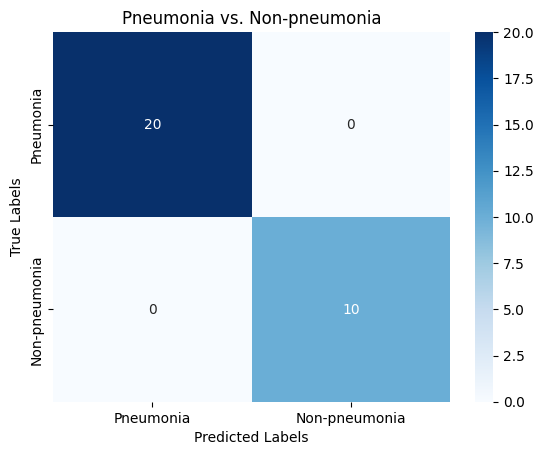

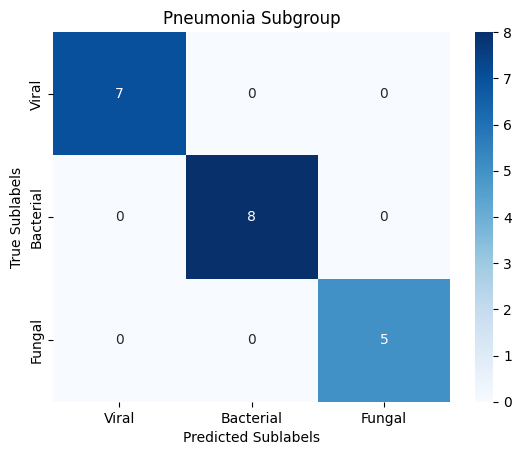

In [ ]:
# 대소문자 구분 없이 비교
result_df['label'] = result_df['label'].str.lower()
result_df['gpt_label'] = result_df['gpt_label'].str.lower()
result_df['sub-label'] = result_df['sub-label'].str.lower()
result_df['gpt_sublabel'] = result_df['gpt_sublabel'].str.lower()

# 2x2 혼동 행렬 생성
conf_matrix_2x2 = confusion_matrix(result_df['label'], result_df['gpt_label'], labels=["pneumonia", "non-pneumonia"])


# 3x3 혼동 행렬 생성 (결측치 제외)
df_filtered = result_df.dropna(subset=['sub-label', 'gpt_sublabel'])
conf_matrix_3x3 = confusion_matrix(df_filtered['sub-label'], df_filtered['gpt_sublabel'], labels=["viral", "bacterial", "fungal"])


# confusion matrix
sns.heatmap(conf_matrix_2x2, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pneumonia", "Non-pneumonia"],
            yticklabels=["Pneumonia", "Non-pneumonia"])
plt.title("Pneumonia vs. Non-pneumonia")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

sns.heatmap(conf_matrix_3x3, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Viral", "Bacterial", "Fungal"],
            yticklabels=["Viral", "Bacterial", "Fungal"])
plt.title("Pneumonia Subgroup")
plt.xlabel("Predicted Sublabels")
plt.ylabel("True Sublabels")
plt.show()

**결과 확인**

In [ ]:
print(df_filtered.iloc[2,:])

label                                         pneumonia
sub-label                                     bacterial
gpt_output      [Label: Pneumonia\nSublabel: Bacterial]
gpt_label                                     pneumonia
gpt_sublabel                                  bacterial
Name: 2, dtype: object


In [ ]:
print(df['note'][2])

Admission Date: 2025-5-15 Discharge Date: 2025-5-28
 
 Date of Birth: 1987-10-12 Sex: M
 
 Service: PULMONOLOGY
 
 HISTORY OF PRESENT ILLNESS: Mr. [**Known lastname **] [**Known lastname 65816**], a previously healthy 37-year-old male, presented with a one-week history of fever, cough and difficulty breathing. He denied any recent travel or contact with sick individuals. He had no known allergies and did not take any medications.
 
 On examination, his temperature was 38.5C, heart rate 115 bpm and SpO2 88% on room air. Lung auscultation revealed decreased breath sounds and crackles in the lower lobes bilaterally. 
 
 His initial chest radiograph demonstrated bilateral infiltrates, suggestive of pneumonia. Sputum samples were collected for culture and he was started on broad-spectrum antibiotics.
 
 PHYSICAL EXAMINATION: Mr. [**Known lastname **] appeared acutely ill. He was in apparent respiratory distress with use of accessory muscles. His breath sounds were decreased with crackles he